In [266]:
import numpy as np
import pandas as pd

# Loading the dataset

In [267]:
train=pd.read_csv(r"data\train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv(r'data\test_Y3wMUE5_7gLdaTN.csv')

# Loading packages

In [268]:
#Visualisation Library
import seaborn as sns
import matplotlib.pyplot as plt

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

#Classification model 
from sklearn.linear_model import LogisticRegression

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn import metrics

In [269]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [270]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [271]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [272]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [273]:
train.shape,test.shape

((614, 13), (367, 12))

In [274]:
train["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

# Visualising Categorical variables

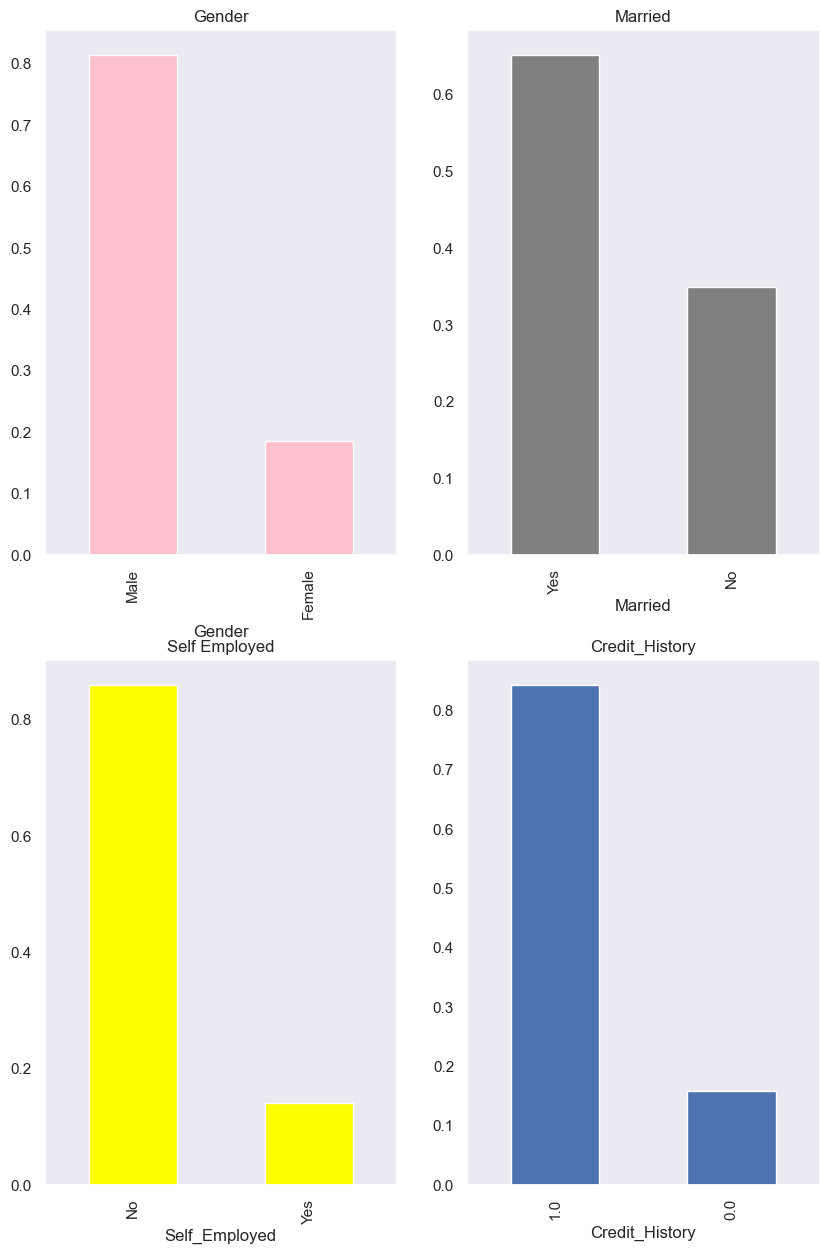

In [275]:
plt.figure(1) 
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,15),title='Gender',color='pink')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,15),title='Married',color='grey')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,15),title='Self Employed',color='yellow')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,15),title='Credit_History')
plt.show()

conclusion:大多数贷款申请人是男性，已婚且自营业者，信用历史为1.0

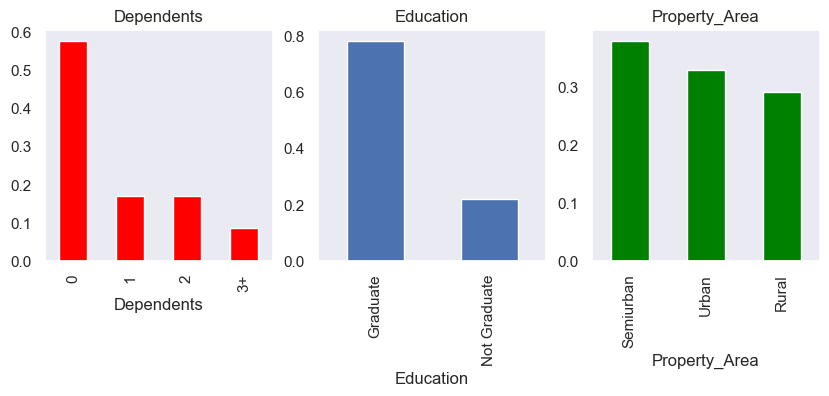

In [276]:
plt.figure(1)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Dependents',color='red')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Property_Area',color='green')
plt.show()

大多数申请人没有扶养人，是毕业生，并且来自半城市地区

In [277]:
train['Dependents']=train['Dependents'].replace('3+','3')

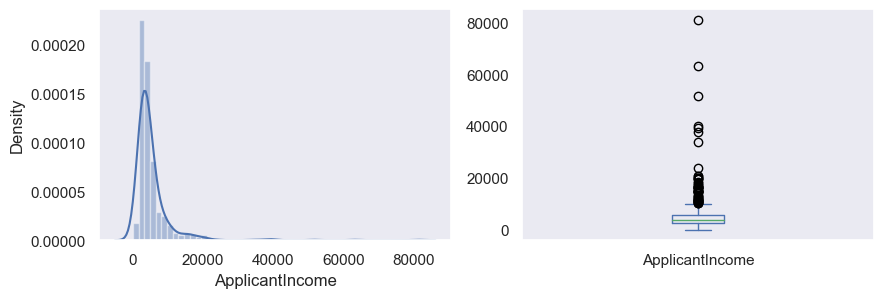

In [278]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(10,3))
plt.show()

观察到申请人收入具有较高的左偏斜，这意味着存在异常值，在构建模型之前需要对其进行处理

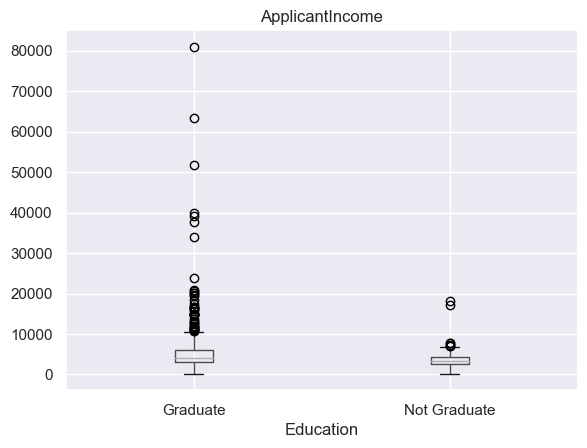

In [279]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
plt.show()

毕业生异常值的数量比非毕业生更多

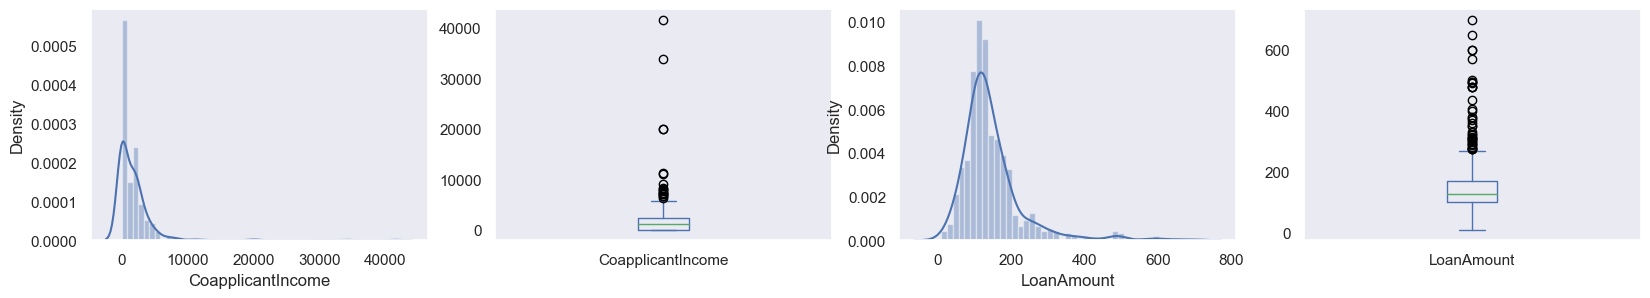

In [280]:
plt.figure(1)
plt.subplot(1,4,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,4,2)
train['CoapplicantIncome'].plot.box(figsize=(20,3))
plt.subplot(1,4,3)
sns.distplot(train['LoanAmount'])
plt.subplot(1,4,4)
train['LoanAmount'].plot.box()
plt.show()

共同申请人收入的偏度较高，而贷款金额的偏度较轻

# Bivariate Analysis(双变量分析)

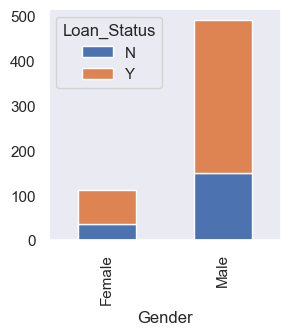

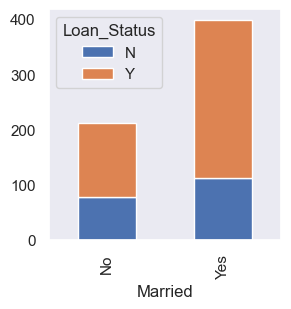

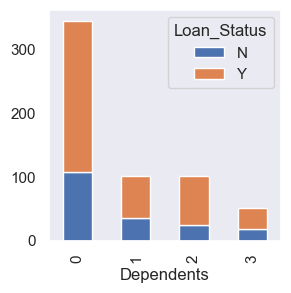

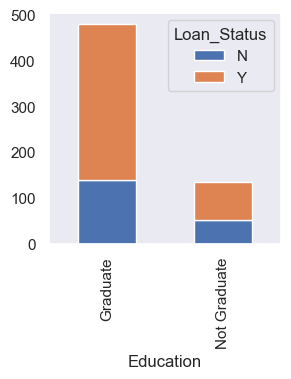

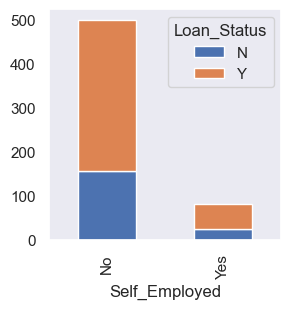

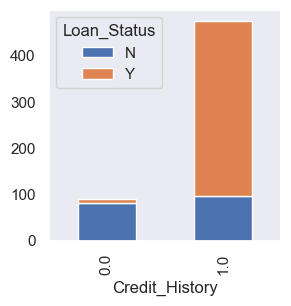

In [281]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
gender.plot(kind='bar',stacked=True,figsize=(3,3))

married=pd.crosstab(train['Married'],train['Loan_Status'])
married.plot(kind='bar',stacked=True,figsize=(3,3))

dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.plot(kind='bar',stacked=True,figsize=(3,3))

education=pd.crosstab(train['Education'],train['Loan_Status'])
education.plot(kind='bar',stacked=True,figsize=(3,3))

selfemployed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
selfemployed.plot(kind='bar',stacked=True,figsize=(3,3))

credithistory=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credithistory.plot(kind='bar',stacked=True,figsize=(3,3))

plt.show()

大多数毕业生、自雇人士以及没有抚养人的申请人有较高的贷款批准机会  
信用历史为0的申请人获得贷款的机会非常低

## Correlation of dataset

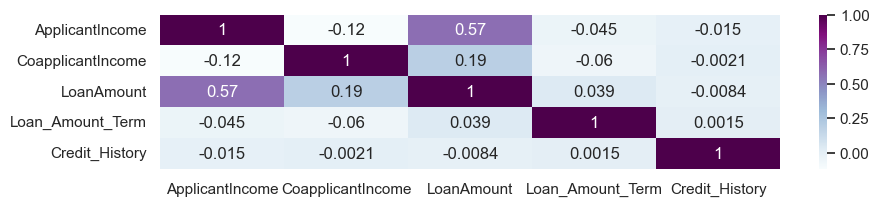

In [282]:
plt.figure(figsize=(10,2))
sns.heatmap(train[['ApplicantIncome','CoapplicantIncome','LoanAmount'
                   ,'Loan_Amount_Term','Credit_History']].corr(),cmap='BuPu',annot=True)
plt.show()

In [283]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [284]:
numeric_col= train.select_dtypes([int,float]).columns
object_col= train.select_dtypes([object]).columns
print('object columns: ', object_col)
print('numeric columns:' , numeric_col)

object columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [285]:
# 使用平均值填充缺失值
for i in train[numeric_col]:
    print(i,':' ,round(train[i].mean(),2))
    train[i].fillna(round(train[i].mean(),2),inplace=True)

ApplicantIncome : 5403.46
CoapplicantIncome : 1621.25
LoanAmount : 146.41
Loan_Amount_Term : 342.0
Credit_History : 0.84


In [286]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [287]:
# 使用众数填充缺失值
for i in train[object_col]:
    print(i,':', train[i].mode()[0])
    train[i].fillna(train[i].mode()[0],inplace=True)

Loan_ID : LP001002
Gender : Male
Married : Yes
Dependents : 0
Education : Graduate
Self_Employed : No
Property_Area : Semiurban
Loan_Status : Y


In [288]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Understanding the uniqueness of our data¶

In [289]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

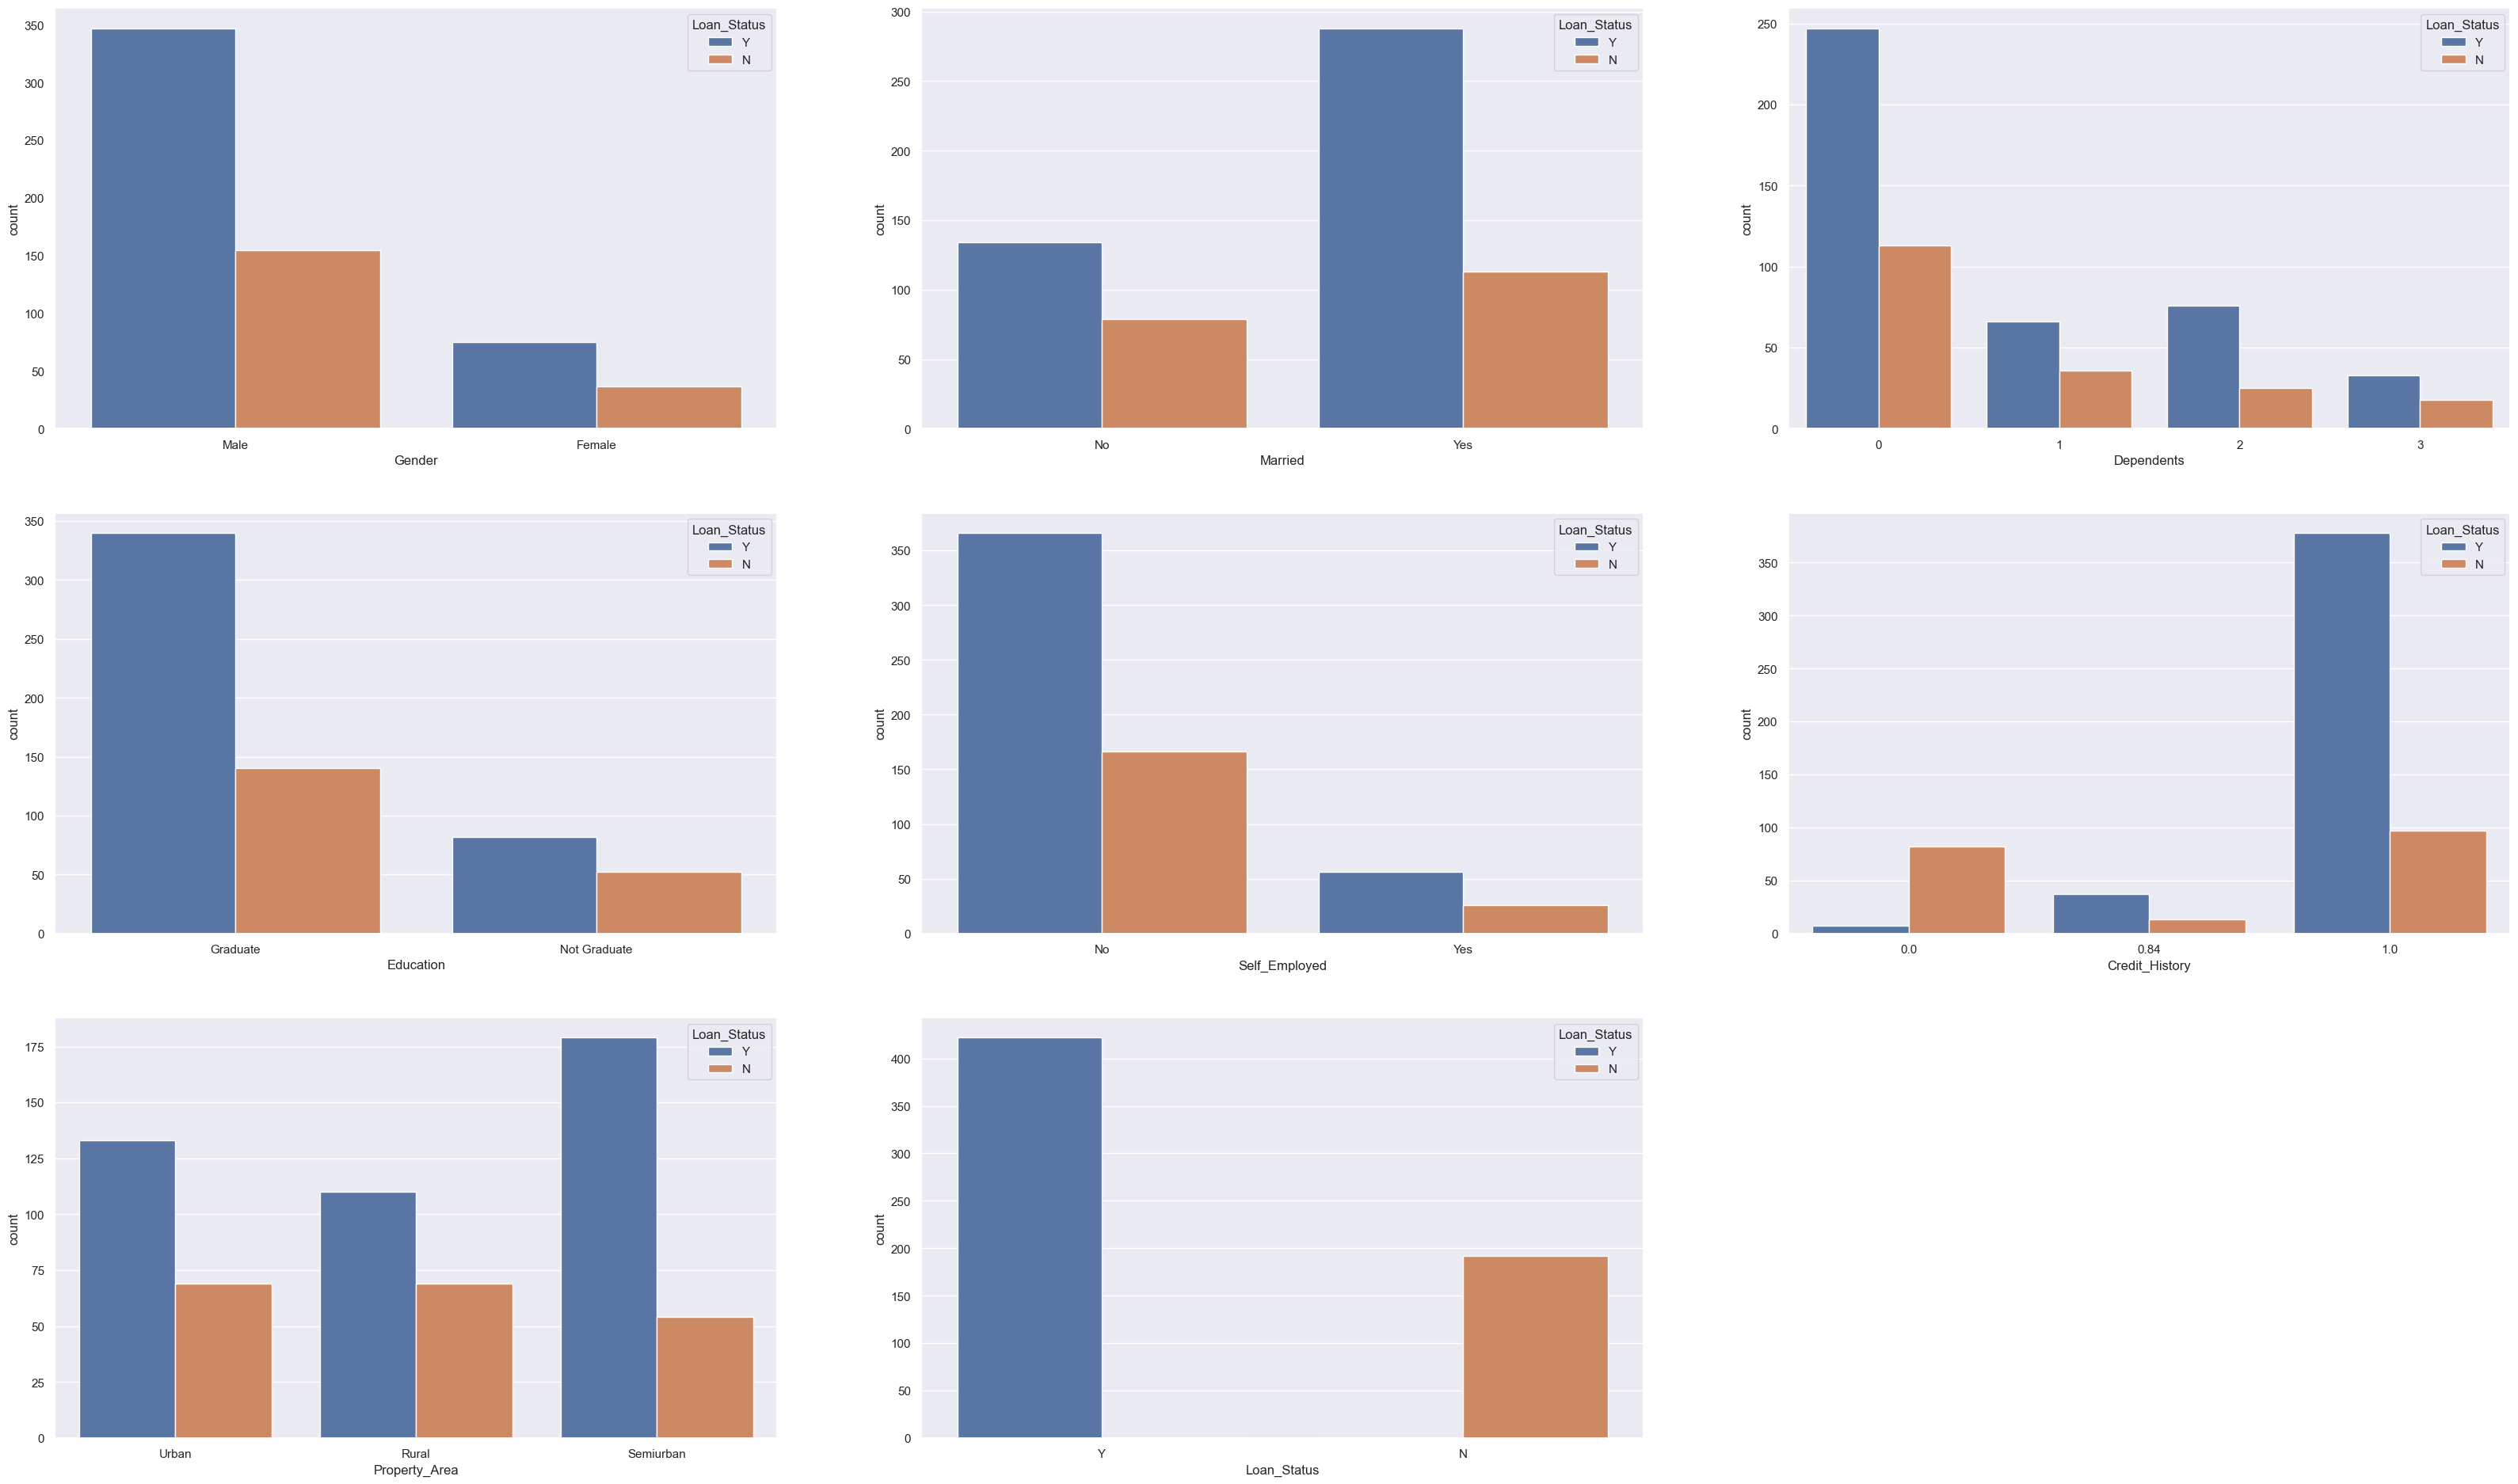

In [290]:
v= train[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area' \
          ,'Loan_Status']].columns
plt.figure(figsize=(40,40))
for i,col in enumerate(v):
    plt.subplot(5,3,i+1)
    sns.set(style='darkgrid')
    sns.countplot(x=train[col],hue=train['Loan_Status'])
plt.show()

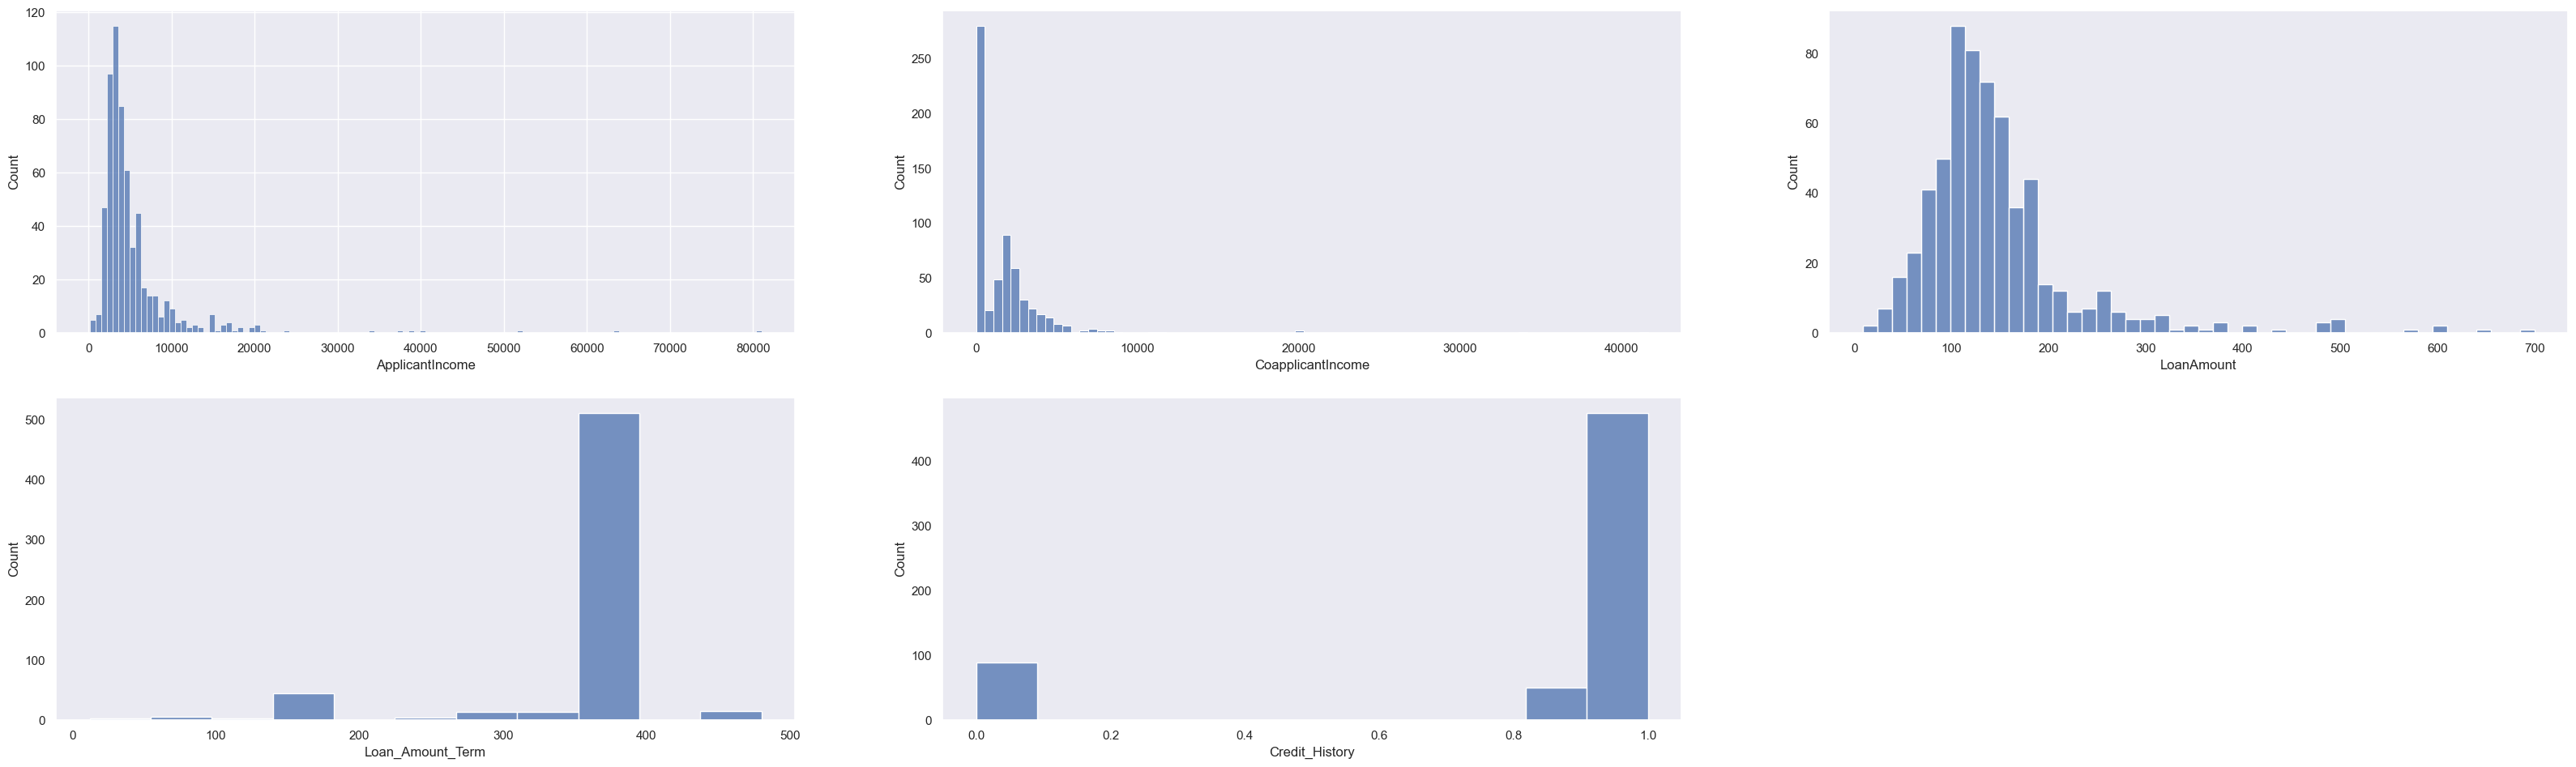

In [291]:
plt.figure(figsize=(40,30))
for i,col in enumerate(numeric_col):
    plt.subplot(5,3,i+1)
    sns.set_style('dark')
    sns.histplot(train[col])
plt.show()

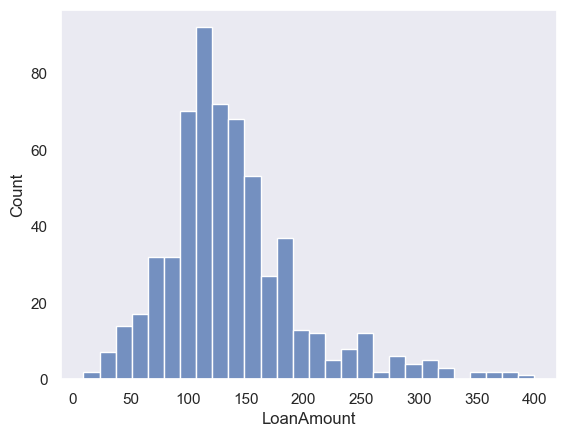

In [292]:
train.drop(train['LoanAmount'][train['LoanAmount']>400].index, inplace=True)
sns.histplot(train['LoanAmount'])
plt.show()

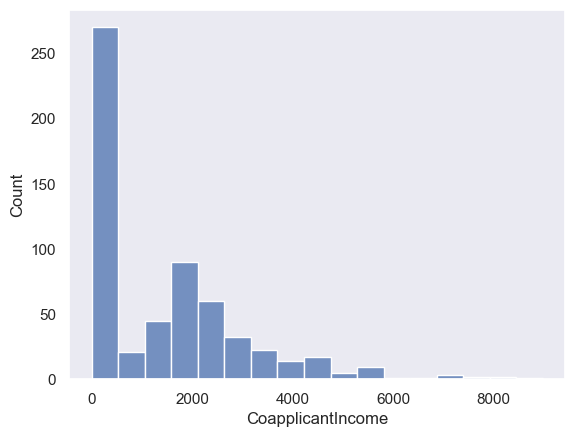

In [293]:
train.drop(train['CoapplicantIncome'][train['CoapplicantIncome']>10000].index, inplace=True)
sns.histplot(train['CoapplicantIncome'])
plt.show()

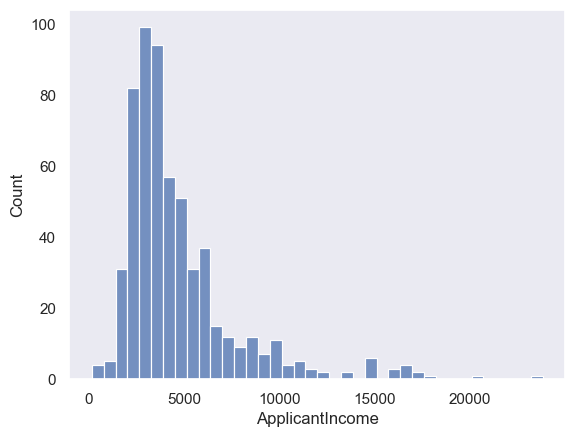

In [294]:
train.drop(train['ApplicantIncome'][train['ApplicantIncome']>25000].index, inplace=True)
sns.histplot(train['ApplicantIncome'])
plt.show()

In [295]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            591 non-null    object 
 1   Gender             591 non-null    object 
 2   Married            591 non-null    object 
 3   Dependents         591 non-null    object 
 4   Education          591 non-null    object 
 5   Self_Employed      591 non-null    object 
 6   ApplicantIncome    591 non-null    int64  
 7   CoapplicantIncome  591 non-null    float64
 8   LoanAmount         591 non-null    float64
 9   Loan_Amount_Term   591 non-null    float64
 10  Credit_History     591 non-null    float64
 11  Property_Area      591 non-null    object 
 12  Loan_Status        591 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.6+ KB


In [297]:
train['Dependents']=train['Dependents'].astype('int')

In [298]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


In [299]:
train['Married']=train['Married'].map({'Yes':1, 'No':0})
train['Education']=train['Education'].map({'Graduate':1, 'Not Graduate':0})
train['Self_Employed']=train['Self_Employed'].map({'Yes':1, 'No':0})
train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N':0})

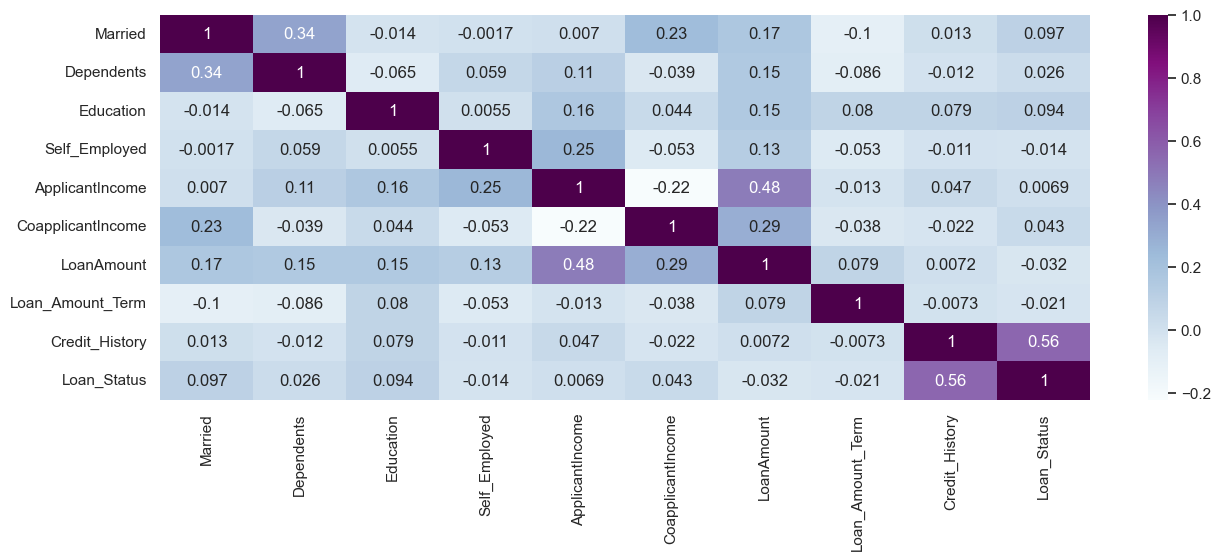

In [300]:
plt.figure(figsize=(15,5))
sns.heatmap(train[['Married','Dependents','Education',
                   'Self_Employed','ApplicantIncome','CoapplicantIncome',
                   'LoanAmount','Loan_Amount_Term','Credit_History',
                   'Loan_Status']].corr(),cmap='BuPu',annot=True)
plt.show()

贷款状态与信用历史之间存在高度相关性

# Dropping redundant columns

In [301]:
train.drop('Loan_ID',axis=1, inplace=True)

In [302]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,1,0,5849,0.0,146.41,360.0,1.0,Urban,1
1,Male,1,1,1,0,4583,1508.0,128.00,360.0,1.0,Rural,0
2,Male,1,0,1,1,3000,0.0,66.00,360.0,1.0,Urban,1
3,Male,1,0,0,0,2583,2358.0,120.00,360.0,1.0,Urban,1
4,Male,0,0,1,0,6000,0.0,141.00,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,1,0,2900,0.0,71.00,360.0,1.0,Rural,1
610,Male,1,3,1,0,4106,0.0,40.00,180.0,1.0,Rural,1
611,Male,1,1,1,0,8072,240.0,253.00,360.0,1.0,Urban,1
612,Male,1,2,1,0,7583,0.0,187.00,360.0,1.0,Urban,1


In [303]:
train=pd.get_dummies(train)
train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,146.41,360.0,1.0,1,False,True,False,False,True
1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,0,False,True,True,False,False
2,1,0,1,1,3000,0.0,66.00,360.0,1.0,1,False,True,False,False,True
3,1,0,0,0,2583,2358.0,120.00,360.0,1.0,1,False,True,False,False,True
4,0,0,1,0,6000,0.0,141.00,360.0,1.0,1,False,True,False,False,True


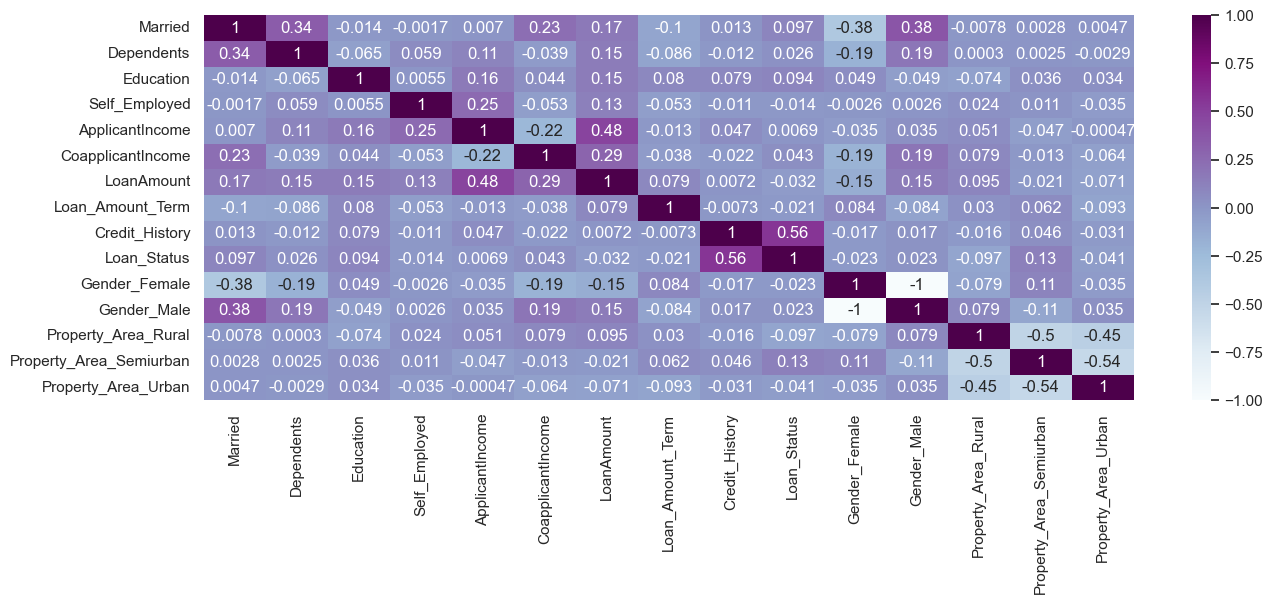

In [304]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),cmap='BuPu',annot=True)
plt.show()

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  591 non-null    int64  
 1   Dependents               591 non-null    int32  
 2   Education                591 non-null    int64  
 3   Self_Employed            591 non-null    int64  
 4   ApplicantIncome          591 non-null    int64  
 5   CoapplicantIncome        591 non-null    float64
 6   LoanAmount               591 non-null    float64
 7   Loan_Amount_Term         591 non-null    float64
 8   Credit_History           591 non-null    float64
 9   Loan_Status              591 non-null    int64  
 10  Gender_Female            591 non-null    bool   
 11  Gender_Male              591 non-null    bool   
 12  Property_Area_Rural      591 non-null    bool   
 13  Property_Area_Semiurban  591 non-null    bool   
 14  Property_Area_Urban      591 no

# Model building

In [306]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [307]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,stratify=y)

In [308]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [309]:
ypred=lr.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8243243243243243
[[ 20  26]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        46
           1       0.80      1.00      0.89       102

    accuracy                           0.82       148
   macro avg       0.90      0.72      0.75       148
weighted avg       0.86      0.82      0.80       148



## Stratified K-Folds

In [310]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x,y):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(xtest)
    pred= model.predict_proba(xvl)[:,1]

1 of kfold 5
Accuracy score:  0.7983193277310925
2 of kfold 5
Accuracy score:  0.7966101694915254
3 of kfold 5
Accuracy score:  0.8135593220338984
4 of kfold 5
Accuracy score:  0.7966101694915254
5 of kfold 5
Accuracy score:  0.8305084745762712


## ROC-AUC Curve

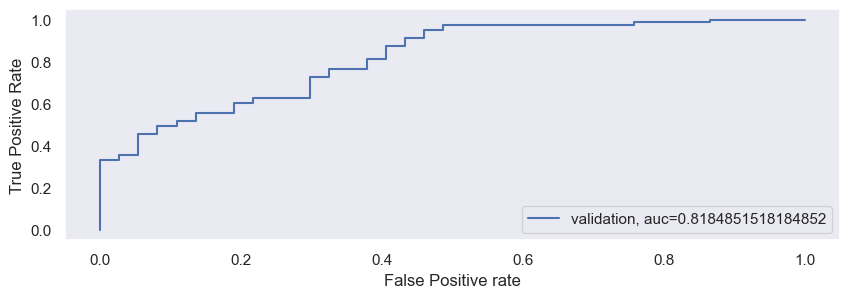

In [311]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')   
plt.legend(loc=4)
plt.show()

# test

In [312]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [313]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)

In [314]:
test['Dependents']=test['Dependents'].replace('3+',3)
test['Dependents']=test['Dependents'].astype(int)

In [315]:
test_og = pd.DataFrame()
test_og['Loan_ID'] = test['Loan_ID']
test_og

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [316]:
test.drop('Loan_ID',axis=1, inplace=True)
test['Married']=test['Married'].map({'Yes':1, 'No':0})
test['Self_Employed']=test['Self_Employed'].map({'Yes':1, 'No':0})
test['Education']=test['Education'].map({'Graduate':1, 'Not Graduate':0})

In [317]:
test=pd.get_dummies(test)
test.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5720,0,110.0,360.0,1.000000,False,True,False,False,True
1,1,1,1,0,3076,1500,126.0,360.0,1.000000,False,True,False,False,True
2,1,2,1,0,5000,1800,208.0,360.0,1.000000,False,True,False,False,True
3,1,2,1,0,2340,2546,100.0,360.0,0.825444,False,True,False,False,True
4,0,0,0,0,3276,0,78.0,360.0,1.000000,False,True,False,False,True


In [318]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  367 non-null    int64  
 1   Dependents               367 non-null    int32  
 2   Education                367 non-null    int64  
 3   Self_Employed            367 non-null    int64  
 4   ApplicantIncome          367 non-null    int64  
 5   CoapplicantIncome        367 non-null    int64  
 6   LoanAmount               367 non-null    float64
 7   Loan_Amount_Term         367 non-null    float64
 8   Credit_History           367 non-null    float64
 9   Gender_Female            367 non-null    bool   
 10  Gender_Male              367 non-null    bool   
 11  Property_Area_Rural      367 non-null    bool   
 12  Property_Area_Semiurban  367 non-null    bool   
 13  Property_Area_Urban      367 non-null    bool   
dtypes: bool(5), float64(3), in

In [319]:
pred_test=model.predict(test)

In [322]:
submission=pd.DataFrame()
submission['Loan_ID']=test_og['Loan_ID']
submission['Loan_Status']=pred_test
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [323]:
submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes', 2: 'No'})

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic_Regression.csv')